Question Number 4
Write a program to do: A dataset collected in a cosmetics shop showing
details of customers and whether or not they responded to a special offer
to buy a new lip-stick is shown in table below. (Implement step by step
using commands - Dont use library) Use this dataset to build a decision
tree, with Buys as the target variable, to help in buying lipsticks in the
future. Find the root node of the decision tree.


In [ ]:
import numpy as np
import pandas as pd
from numpy import log2 as log
import math

In [ ]:
eps = np.finfo(float).eps

In [ ]:


df = pd.read_csv("sales.csv")
df

,Age,Income,Gender,MaritialStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [ ]:
# df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             14 non-null     object
 1   Income          14 non-null     object
 2   Gender          14 non-null     object
 3   MaritialStatus  14 non-null     object
 4   Buys            14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [ ]:
Class = df.keys()[-1]
values = df[Class].unique()
entropy = 0
for x in values:
  fraction = df[Class].value_counts()[x]/len(df[Class])
  entropy+= -(fraction * math.log(fraction,2))
print(entropy)

0.9402859586706309


In [ ]:
def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
    # print(target_variables)
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
    # print(variables)
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/den
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)

In [ ]:
Gain = []
for key in df.keys()[:-1]:
  Gain.append(entropy - find_entropy_attribute(df,key))
print(Gain)
root_node = df.keys()[:-1][np.argmax(Gain)]
print(root_node)

[0.24674981977443955, 0.029222565658955313, 0.15183550136234203, 0.016111606370190268]
Age


5,6,7,8 
Write a program to do: A dataset collected in a cosmetics shop showing
details of customers and whether or not they responded to a special offer
to buy a new lip-stick is shown in table below. (Use library commands)
According to the decision tree you have made from the previous training
data set, what is the decision for the test data:
 a. [Age < 21, Income = Low, Gender = Female, Marital Status = Married]?   
 b. [Age > 35, Income = Medium, Gender = Female, Marital Status = Married]?
 c.[Age > 35, Income = Medium, Gender = Female, Marital Status = Married]?
 d.[Age = 21-35, Income = Low, Gender = Male, Marital Status = Married]?


In [ ]:
df

,Age,Income,Gender,MaritialStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder();

x=df.iloc[:,:-1] #-1 means don't take last column 
x=x.apply(le.fit_transform)

print("Age with encodd value :",list( zip(df.iloc[:,0], x.iloc[:,0])))
print("\nIncome with encoded value :",list( zip(df.iloc[:,1], x.iloc[:,1]))) 
print("\nGender with encoded value :",list( zip(df.iloc[:,2], x.iloc[:,2]))) 
print("\nmaritialStatus with encoded value :",list( zip(df.iloc[:,3], x.iloc[:,3])))





Age with encodd value : [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]

Income with encoded value : [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0), ('Medium', 2)]

Gender with encoded value : [('Male', 1), ('Male', 1), ('Male', 1), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Male', 1)]

maritialStatus with encoded value : [('Single', 1), ('Married', 0), ('Single', 1), ('Single', 1), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0)]


In [ ]:
print(x)

    Age  Income  Gender  MaritialStatus
0     1       0       1               1
1     1       0       1               0
2     0       0       1               1
3     2       2       1               1
4     2       1       0               1
5     2       1       0               0
6     0       1       0               0
7     1       2       1               1
8     1       1       0               0
9     2       2       0               1
10    1       2       0               0
11    0       2       1               0
12    0       0       0               1
13    2       2       1               0


In [ ]:
y=df.iloc[:,-1]
from sklearn.tree import DecisionTreeClassifier 
classifier=DecisionTreeClassifier(criterion='entropy') 
classifier.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
x_test_5 = np.array([1,1,0,0])
x_test_6 = np.array([2,2,0,0])
x_test_7 = np.array([2,2,0,0])
x_test_8 = np.array([0,1,1,0])

In [ ]:
pred_y=classifier.predict([x_test_5])
print("Predicted class for input[Age < 21, Income = Low, Gender = Female, Marital Status = Married]\n", x_test_5," is ",pred_y[0])
pred_y=classifier.predict([x_test_6])
print("Predicted class for input[Age > 35, Income = Medium, Gender = Female, Marital Status = Married]\n", x_test_6," is ",pred_y[0])
pred_y=classifier.predict([x_test_7])
print("Predicted class for input[Age > 35 , Income = Medium, Gender = Female, Marital Status = Married]\n", x_test_7," is ",pred_y[0])
pred_y=classifier.predict([x_test_8])
print("Predicted class for input[Age 21-35 , Income = Low, Gender = Male, Marital Status = Married]\n", x_test_8," is ",pred_y[0])


Predicted class for input[Age < 21, Income = Low, Gender = Female, Marital Status = Married]
 [1 1 0 0]  is  Yes
Predicted class for input[Age > 35, Income = Medium, Gender = Female, Marital Status = Married]
 [2 2 0 0]  is  No
Predicted class for input[Age > 35 , Income = Medium, Gender = Female, Marital Status = Married]
 [2 2 0 0]  is  No
Predicted class for input[Age 21-35 , Income = Low, Gender = Male, Marital Status = Married]
 [0 1 1 0]  is  Yes


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.4, 0.9, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.2, 0.3, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7, 0.5, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

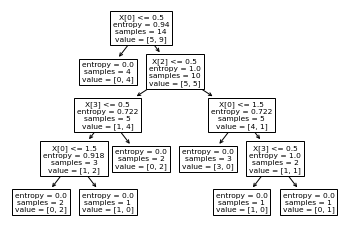

In [29]:
from sklearn import tree
tree.plot_tree(classifier)
